<h4>Joaquin Suarez</h4>

In [1]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline

<h5>Punto 1 taller - Multiplicacion de matrices</h5>

In [2]:
class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [3]:
def multip(m,n): 
    result = np.zeros((len(m),len(n)))
    for i in range(len(m)):
           for j in range(len(n[0])):
                   for k in range(len(n)):
                           result[i][j] += m[i][k] * n[k][j]
    return result

In [4]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
print m
print n
r=multip(m,n)
print r

[[0 8 1]
 [3 1 0]
 [6 4 5]]
[[0 7 7]
 [3 4 4]
 [8 3 7]]
[[ 32.  35.  39.]
 [  3.  25.  25.]
 [ 52.  73.  93.]]


In [5]:
def acctMultip(m,n,acct): 
    result = np.zeros((len(m),len(n))); acct.count()
    for i in range(len(m)):
        acct.count()
        for j in range(len(n[0])):
                acct.count()
                for k in range(len(n)):
                        acct.count()
                        result[i][j] += m[i][k] * n[k][j]; acct.count()
    return result

In [6]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
acct= Counter()
r=acctMultip(m,n,acct)
print m
print n
acct.print_steps()
print r

[[8 5 0]
 [3 5 5]
 [8 4 0]]
[[4 0 8]
 [3 5 5]
 [0 5 6]]
Number of steps = 67
[[ 47.  25.  89.]
 [ 27.  50.  79.]
 [ 44.  20.  84.]]


In [7]:
def exper_analysisM(n):
    result = []
    acct = Counter()
    for i in range(n):
        m= np.random.randint(9, size=(i,i)) 
        x= np.random.randint(9, size=(i,i)) 
        acct.reset()
        acctMultip(m,x,acct)
        result.append(acct.steps)
    print result
    return result

In [8]:
print exper_analysisM(10)

[1, 5, 23, 67, 149, 281, 475, 743, 1097, 1549]
[1, 5, 23, 67, 149, 281, 475, 743, 1097, 1549]


[1, 5, 23, 67, 149, 281, 475, 743, 1097, 1549]


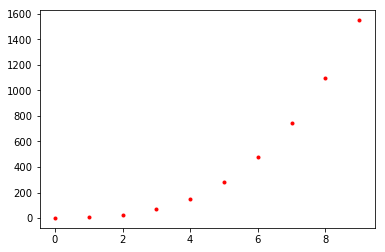

In [9]:
pl.clf()
x = np.arange(10)
y = np.array(exper_analysisM(10))
pl.plot(x, y, 'r.')

<h5>Punto 2 - dividir y conquistar</h5> 

In [10]:
def suma(m,n):
    t = len(m)
    result = np.zeros((len(m),len(n)))
    for i in range(t):
        for j in range(t):
            result[i][j] = m[i][j] + n[i][j]
    return result

def dividirMultip(m, n):
    bandera=0 
    if (len(m) <= 2):
         return multip(m,n)
    else :
        L=len(m)
        if(L%2!=0):
            x = np.zeros((L, 1))
            y = np.zeros((1, L+1))
            m = np.c_[m,x]
            m = np.r_[m,y]
            n = np.c_[n,x]
            n = np.r_[n,y]
            L=L+1    
            bandera=1 
        L= (L)/2
        aa=m[:L,:L]
        ab=m[:L,L:]
        ac=m[L:,:L]
        ad=m[L:,L:]
        ba=n[:L,:L]
        bb=n[:L,L:]
        bc=n[L:,:L]
        bd=n[L:,L:]     
    caa =dividirMultip(aa,ba)
    cab =dividirMultip(ab,bc)
    cba =dividirMultip(aa,bb)
    cbb =dividirMultip(ab,bd)
    cca=dividirMultip(ac,ba)
    ccb =dividirMultip(ad,bc)
    cda =dividirMultip(ac,bb)
    cdb =dividirMultip(ad,bd)
    ca = suma(caa,cab)
    cb = suma(cba,cbb)
    cc = suma(cca,ccb)
    cd = suma(cda,cdb)
    ca = np.c_[ca,cb]
    cc = np.c_[cc,cd]
    ca = np.r_[ca,cc]
    if bandera==1:
        l=len(ca)
        ca = ca[:l-1,:l-1]
    return ca

In [11]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
print m
print n
r=dividirMultip(m,n)
print r

[[2 7 4]
 [1 0 2]
 [1 3 0]]
[[5 6 3]
 [5 2 7]
 [3 0 7]]
[[ 57.  26.  83.]
 [ 11.   6.  17.]
 [ 20.  12.  24.]]


In [12]:
def acctSuma(m,n,acct):
    t = len(m); acct.count()
    result = np.zeros((len(m),len(n))); acct.count()
    for i in range(t):
        acct.count()
        for j in range(t):
            acct.count()
            result[i][j] = m[i][j] + n[i][j]; acct.count()
    return result

def acctDividirMultip(m, n, acct):
    bandera=0; acct.count()
    if (len(m) <= 2):
        acct.count()
        return acctMultip(m,n,acct)
    else :
        L=len(m); acct.count()
        if(L%2!=0):
            acct.count()
            x = np.zeros((L, 1)); acct.count()
            y = np.zeros((1, L+1)); acct.count()
            m = np.c_[m,x]; acct.count()
            m = np.r_[m,y]; acct.count()
            n = np.c_[n,x]; acct.count()
            n = np.r_[n,y]; acct.count()
            L=L+1; acct.count()
            bandera=1; acct.count()
        L= (L)/2; acct.count()
        aa=m[:L,:L]; acct.count()
        ab=m[:L,L:]; acct.count()
        ac=m[L:,:L]; acct.count()
        ad=m[L:,L:]; acct.count()
        ba=n[:L,:L]; acct.count()
        bb=n[:L,L:]; acct.count()
        bc=n[L:,:L]; acct.count()
        bd=n[L:,L:]; acct.count()
    caa =dividirMultip(aa,ba); acct.count()
    cab =dividirMultip(ab,bc); acct.count()
    cba =dividirMultip(aa,bb); acct.count()
    cbb =dividirMultip(ab,bd); acct.count()
    cca=dividirMultip(ac,ba); acct.count()
    ccb =dividirMultip(ad,bc); acct.count()
    cda =dividirMultip(ac,bb); acct.count()
    cdb =dividirMultip(ad,bd); acct.count()
    ca = suma(caa,cab); acct.count()
    cb = suma(cba,cbb); acct.count()
    cc = suma(cca,ccb); acct.count()
    cd = suma(cda,cdb); acct.count()
    ca = np.c_[ca,cb]; acct.count()
    cc = np.c_[cc,cd]; acct.count()
    ca = np.r_[ca,cc]; acct.count()
    if bandera==1:
        acct.count()
        l=len(ca); acct.count()
        ca = ca[:l-1,:l-1]; acct.count()
    return ca

In [13]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
acct= Counter()
r=acctDividirMultip(m,n,acct)
print m
print n
acct.print_steps()
print r

[[7 4 3]
 [4 8 3]
 [4 3 6]]
[[5 2 1]
 [3 0 4]
 [4 3 4]]
Number of steps = 38
[[ 59.  23.  35.]
 [ 56.  17.  48.]
 [ 53.  26.  40.]]


In [14]:
def exper_analysisD(n):
    result = []
    acct = Counter()
    for i in range(n):
        m= np.random.randint(9, size=(i,i)) 
        x= np.random.randint(9, size=(i,i)) 
        acct.reset()
        acctDividirMultip(m,x,acct)
        result.append(acct.steps)
    print result
    return result

In [15]:
print exper_analysisD(10)

[3, 7, 25, 38, 26, 38, 26, 38, 26, 38]
[3, 7, 25, 38, 26, 38, 26, 38, 26, 38]


[3, 7, 25, 38, 26, 38, 26, 38, 26, 38]


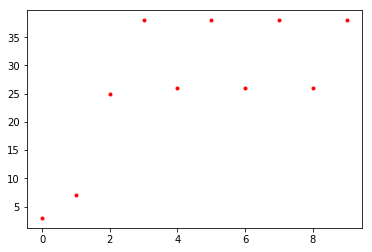

In [16]:
pl.clf()
x = np.arange(10)
y = np.array(exper_analysisD(10))
pl.plot(x, y, 'r.')

<h5>Punto 3 - Strassen</h5>

In [17]:
def resta(m,n):
    t = len(m)
    result = np.zeros((len(m),len(n)))
    for i in range(t):
        for j in range(t):
            result[i][j] = m[i][j] - n[i][j]
    return result

def strassenMultip(m, n):
    bandera=0 
    if (len(m) <= 2):
         return multip(m,n)
    else :
        L=len(m)
        if(L%2!=0):
            x = np.zeros((L, 1))
            y = np.zeros((1, L+1))
            m = np.c_[m,x]
            m = np.r_[m,y]
            n = np.c_[n,x]
            n = np.r_[n,y]
            L=L+1    
            bandera=1 
        L= (L)/2
        aa=m[:L,:L]
        ab=m[:L,L:]
        ac=m[L:,:L]
        ad=m[L:,L:]
        ba=n[:L,:L]
        bb=n[:L,L:]
        bc=n[L:,:L]
        bd=n[L:,L:]      
    maa = suma(aa,ad)
    mab = suma(ba,bd)
    ma  = strassenMultip(maa,mab)
    mba = suma(ac,ad)
    mb  = strassenMultip(mba,ba)
    mca = resta(bb,bd)
    mc  = strassenMultip(aa,mca)
    mda = resta(bc,ba)
    md  = strassenMultip(ad,mda)
    mea = suma(aa,ab)
    me = strassenMultip(mea,bd)
    mfa = resta(ac,aa)
    mfb = suma(ba,bb)
    mf = strassenMultip(mfa,mfb)
    mga = resta(ab,ad)
    mgb = suma(bc,bd)
    mg = strassenMultip(mga,mgb)
    ca = suma(ma,md)
    ca = resta(ca,me)
    ca = suma(ca,mg)
    cb = suma(mc,me)
    cc = suma(mb,md)
    cd = resta(ma,mb)
    cd = suma(cd,mc)
    cd = suma(cd,mf)
    ca = np.c_[ca,cb]
    cc = np.c_[cc,cd]
    ca = np.r_[ca,cc]
    if bandera==1:
        l=len(ca)
        ca = ca[:l-1,:l-1]
    return ca

In [18]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
print m
print n
r=strassenMultip(m,n)
print r

[[5 2 2]
 [6 4 1]
 [0 8 0]]
[[1 2 4]
 [7 6 6]
 [8 0 0]]
[[ 35.  22.  32.]
 [ 42.  36.  48.]
 [ 56.  48.  48.]]


In [19]:
def acctResta(m,n,acct):
    t = len(m); acct.count()
    result = np.zeros((len(m),len(n))); acct.count()
    for i in range(t):
        acct.count()
        for j in range(t):
            acct.count()
            result[i][j] = m[i][j] - n[i][j]; acct.count()
    return result

def acctStrassenMultip(m, n, acct):
    bandera=0; acct.count()
    if (len(m) <= 2):
        acct.count()
        return multip(m,n)
    else :
        acct.count()
        L=len(m); acct.count()
        if(L%2!=0):
            acct.count()
            x = np.zeros((L, 1)); acct.count()
            y = np.zeros((1, L+1)); acct.count()
            m = np.c_[m,x]; acct.count()
            m = np.r_[m,y]; acct.count()
            n = np.c_[n,x]; acct.count()
            n = np.r_[n,y]; acct.count()
            L=L+1; acct.count()
            bandera=1; acct.count()
        L= (L)/2; acct.count()
        aa=m[:L,:L]; acct.count()
        ab=m[:L,L:]; acct.count()
        ac=m[L:,:L]; acct.count()
        ad=m[L:,L:]; acct.count()
        ba=n[:L,:L]; acct.count()
        bb=n[:L,L:]; acct.count()
        bc=n[L:,:L]; acct.count()
        bd=n[L:,L:]; acct.count()
    maa = suma(aa,ad); acct.count()
    mab = suma(ba,bd); acct.count()
    ma  = strassenMultip(maa,mab); acct.count()
    mba = suma(ac,ad); acct.count()
    mb  = strassenMultip(mba,ba); acct.count()
    mca = resta(bb,bd); acct.count()
    mc  = strassenMultip(aa,mca); acct.count()
    mda = resta(bc,ba); acct.count()
    md  = strassenMultip(ad,mda); acct.count()
    mea = suma(aa,ab); acct.count()
    me = strassenMultip(mea,bd); acct.count()
    mfa = resta(ac,aa); acct.count()
    mfb = suma(ba,bb); acct.count()
    mf = strassenMultip(mfa,mfb); acct.count()
    mga = resta(ab,ad); acct.count()
    mgb = suma(bc,bd); acct.count()
    mg = strassenMultip(mga,mgb); acct.count()
    ca = suma(ma,md); acct.count()
    ca = resta(ca,me); acct.count()
    ca = suma(ca,mg); acct.count()
    cb = suma(mc,me); acct.count()
    cc = suma(mb,md); acct.count()
    cd = resta(ma,mb); acct.count()
    cd = suma(cd,mc); acct.count()
    cd = suma(cd,mf); acct.count()
    ca = np.c_[ca,cb]; acct.count()
    cc = np.c_[cc,cd]; acct.count()
    ca = np.r_[ca,cc]; acct.count()
    if bandera==1:
        acct.count()
        l=len(ca); acct.count()
        ca = ca[:l-1,:l-1]; acct.count()
    return ca

In [20]:
m= np.random.randint(9, size=(3,3)) # de 0 a 9
n= np.random.randint(9, size=(3,3)) # de 0 a 9
acct= Counter()
r=acctStrassenMultip(m,n,acct)
print m
print n
acct.print_steps()
print r

[[5 3 7]
 [5 4 7]
 [6 4 5]]
[[2 3 8]
 [1 4 0]
 [1 1 7]]
Number of steps = 52
[[ 20.  34.  89.]
 [ 21.  38.  89.]
 [ 21.  39.  83.]]


In [21]:
def exper_analysisS(n):
    result = []
    acct = Counter()
    for i in range(n):
        m= np.random.randint(9, size=(i,i)) 
        x= np.random.randint(9, size=(i,i)) 
        acct.reset()
        acctStrassenMultip(m,x,acct)
        result.append(acct.steps)
    print result
    return result

In [22]:
print exper_analysisS(10)

[2, 2, 2, 52, 40, 52, 40, 52, 40, 52]
[2, 2, 2, 52, 40, 52, 40, 52, 40, 52]


[2, 2, 2, 52, 40, 52, 40, 52, 40, 52]


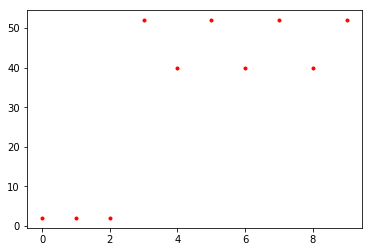

In [23]:
pl.clf()
x = np.arange(10)
y = np.array(exper_analysisS(10))
pl.plot(x, y, 'r.')

<h4> Grafica comparativa</h4>

[1, 5, 23, 67, 149, 281, 475, 743, 1097, 1549]
[3, 7, 25, 38, 26, 38, 26, 38, 26, 38]
[2, 2, 2, 52, 40, 52, 40, 52, 40, 52]


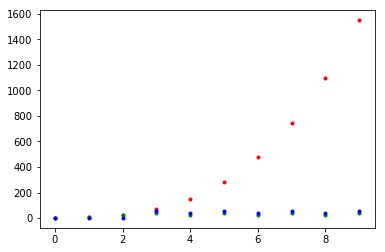

In [25]:
pl.clf()
x = np.arange(10)
M = np.array(exper_analysisM(10))
D = np.array(exper_analysisD(10))
S = np.array(exper_analysisS(10))
pl.plot(x, M, 'r.', x, D, 'g.', x, S, 'b.')